# Insurance  Cross Sell Challenge
---

## Context

- Insurance all is a company that provides health insurance to its costumers and the products team is analyzing the possibilty of offering policyholders car insurance with a similar year subscription.

- The sales team conducted a survey with 380.000 costumers and stored all data in a 

- For this year they will contact 128.000 costumers that didn't answer the survey and offer the new product.



 ## Tasks 
 

**Find the most relevant and important features.** 


**The percentage of interested policyholders that the sales team will reach in 20.000 calls.**


**The percentage of interested policyholders that will be reached with 40.000 calls.**

 
**How many calls to reach all interested policyholders.**
 

## 0.0 Imports

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import inflection
import scikitplot as skplt
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")


from IPython.display            import Image
from IPython.core.display       import HTML
from sklearn                    import preprocessing   as pp
from sklearn                    import model_selection as ms
from sklearn                    import ensemble        as en
from sklearn                    import neighbors       as nh
from sklearn                    import linear_model    as lm
from sklearn.tree               import DecisionTreeClassifier       # Import Decision Tree Classifier
from sklearn.model_selection    import train_test_split  # Import train_test_split function
from sklearn                    import metrics
from scikitplot.metrics         import plot_cumulative_gain, plot_lift_curve


## 0.1 Helper Functions

In [1]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

jupyter_settings();



def recall_at_k(data, k= 20000):
    #reset_index
    data = data.reset_index(drop = True)
    
    #create ranking order
    data['ranking'] = data.index + 1

    data['recall_at_k'] = data['response'].cumsum() / data['response'].sum()
    
    return data.loc[k, 'recall_at_k']




def precision_at_k(data, k= 20000):
    #reset_index
    data = data.reset_index(drop = True)
    
    #create ranking order
    data['ranking'] = data.index + 1

    data['precision_at_k'] = data['response'].cumsum() / data['ranking']
   
    return data.loc[k, 'precision_at_k'];

Populating the interactive namespace from numpy and matplotlib


NameError: name 'HTML' is not defined

## 0.2 Loading Data 

### 0.2.1 Loading data to df_raw

In [22]:
df_raw = pd.read_csv('train.csv')

In [23]:
df_raw.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# 1.0 Data Details

In [24]:
df1 = df_raw.copy()

## 1.1 Data Dictionary

|The data set that we're using is from Kaggle (https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction).



| Feature                                       |Description   
|:---------------------------|:---------------
| **Id**                         | Unique ID for the customer   | 
| **Gender**                           | Gender of the customer   | 
| **Driving License**                                   | 0, customer does not have DL; 1, customer already has DL  | 
| **Region Code**                               | Unique code for the region of the customer   | 
| **Previously Insured**                     | 1, customer already has vehicle insurance; 0, customer doesn't have vehicle insurance | 
| **Vehicle Age**                     | Age of the vehicle | 
| **Vehicle Damage**                                  | 1, customer got his/her vehicle damaged in the past; 0, customer didn't get his/her vehicle damaged in the past | 
| **Anual Premium**                             | The amount customer needs to pay as premium in the year | 
| **Policy sales channel**                                    | Anonymized Code for the channel of outreaching to the customer ie  | 
| **Vintage**                | Number of Days, customer has been associated with the company  | 
| **Response**              | 1, customer is interested; 0, customer is not interested. |    

## 1.2 Data Types

In [25]:
df1.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

## 1.3 Data Dimensions

In [26]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 381109
Number of Cols: 12


## 1.4 Rename Columns

In [27]:
cols_old = ['id', 'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 
            'Policy_Sales_Channel', 'Vintage', 'Response']

snakecase = lambda x: inflection.underscore( x )

cols_new = list( map( snakecase, cols_old ) )

# rename
df1.columns = cols_new

## 1.5 Missing Values

In [28]:
#check for NA
df1.isnull().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

## 1.6 Change Types


In [29]:
# changing data types from float to int64

df1['region_code'] = df1['region_code'].astype('int64')     

df1['policy_sales_channel'] = df1['policy_sales_channel'].astype('int64')    

df1['annual_premium'] = df1['annual_premium'].astype('int64')    


In [30]:
# Confirm changes
df1.dtypes

id                       int64
gender                  object
age                      int64
driving_license          int64
region_code              int64
previously_insured       int64
vehicle_age             object
vehicle_damage          object
annual_premium           int64
policy_sales_channel     int64
vintage                  int64
response                 int64
dtype: object

## 1.7 Descriptive Stastistics

In [31]:
# Split numerical and categorical features
num_attributes = df1.select_dtypes( include=['int64', 'float64'])
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64'])

### 1.7.1 Numerical Attributes

In [32]:
#Central Tendency - mean, meadian

ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis

d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concat

m= pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes','min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m


,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.0,381109.0,381108.0,190555.000000,190555.0,110016.691870,9.443274e-16,-1.200000
1,age,20.0,85.0,65.0,38.822584,36.0,15.511591,6.725390e-01,-0.565655
2,driving_license,0.0,1.0,1.0,0.997869,1.0,0.046109,-2.159518e+01,464.354302
3,region_code,0.0,52.0,52.0,26.388807,28.0,13.229871,-1.152664e-01,-0.867857
4,previously_insured,0.0,1.0,1.0,0.458210,0.0,0.498251,1.677471e-01,-1.971871
5,annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087e+00,34.004569
6,policy_sales_channel,1.0,163.0,162.0,112.034295,133.0,54.203924,-9.000081e-01,-0.970810
7,vintage,10.0,299.0,289.0,154.347397,154.0,83.671194,3.029517e-03,-1.200688
8,response,0.0,1.0,1.0,0.122563,0.0,0.327935,2.301906e+00,3.298788


### 1.7.2 Categorical Attributes

In [33]:
cat_attributes.describe().T

,count,unique,top,freq
gender,381109,2,Male,206089
vehicle_age,381109,3,1-2 Year,200316
vehicle_damage,381109,2,Yes,192413


# 2.0 Feature Engineering

In [34]:
df2 = df1.copy()

In [35]:
# vehicle age
df2['vehicle_age']= df2['vehicle_age'].apply( lambda x: 'over_2_years' if x == '> 2 Years' else 'between_1_2year' if x== '1-2 Year' else 'between_1_2_year')
# vehicle damage
df2['vehicle_damage'] = df2['vehicle_damage'].apply( lambda x: 1 if x == 'Yes' else 0 )

## 2.1 Mind Map

In [36]:
from IPython.display       import Image

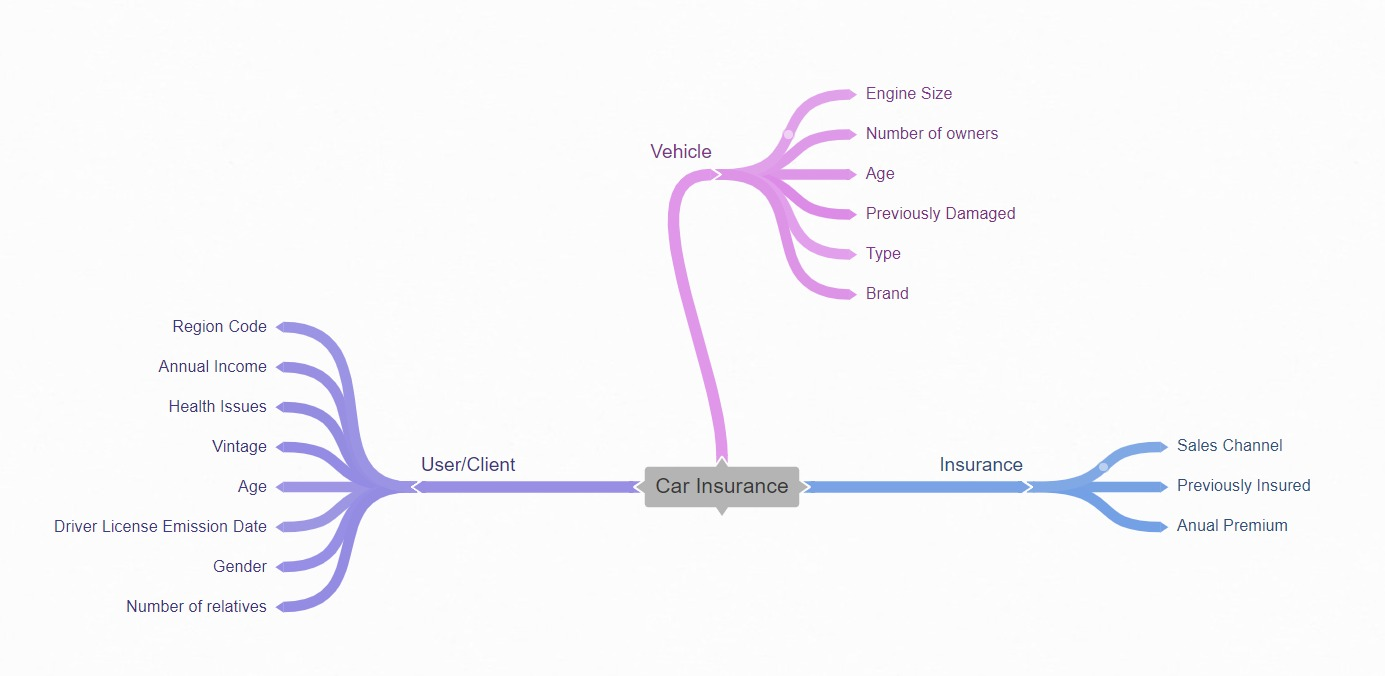

In [37]:
Image( 'mindmap.jpeg' )

## 2.2 Hypotheses Formulation

### 2.2.1 User/Client

1. Younger users should be more interested.

2. Users with most time associated should be more interested.

3. Users with drivers license should be more interested.

### 2.2.2 Insurance

1. Users that had car insurance are less interested than the ones who don't.

2. Users reached troughout the phone should be more interested.

3. Users with the annual premimum higher should be more interested.


### 2.2.3 Vehicle

1. Users with vehicles should be more interested

2. Users with previous crashed vehicles should be more interested

3. Users that have older cars should have more interest

## 2.3 Final List

1. Younger users should be more interested.

2. Users with most time associated should be more interested.

3. Users with drivers license should be more interested.

4. Users that had car insurance are less interested than the ones who don't.

5. Users reached troughout the phone should be more interested

6. Users with the price for insurance lower should be more interested

7. Users with vehicles should be more interested

8. Users with previous crashed vehicles should be more interested

9. Users that have older cars should have more interest

# 3.0 Data Filtering

In [38]:
df3 = df2.copy()

- There is no need for Data Filtering, as all the data is useful for the goal persuit

# 4.0 Exploratory Data Analysis (EDA)

In [39]:
df4 = df3.copy()

## 4.1 Univariate Analysis

## 4.1.1 Response Variable

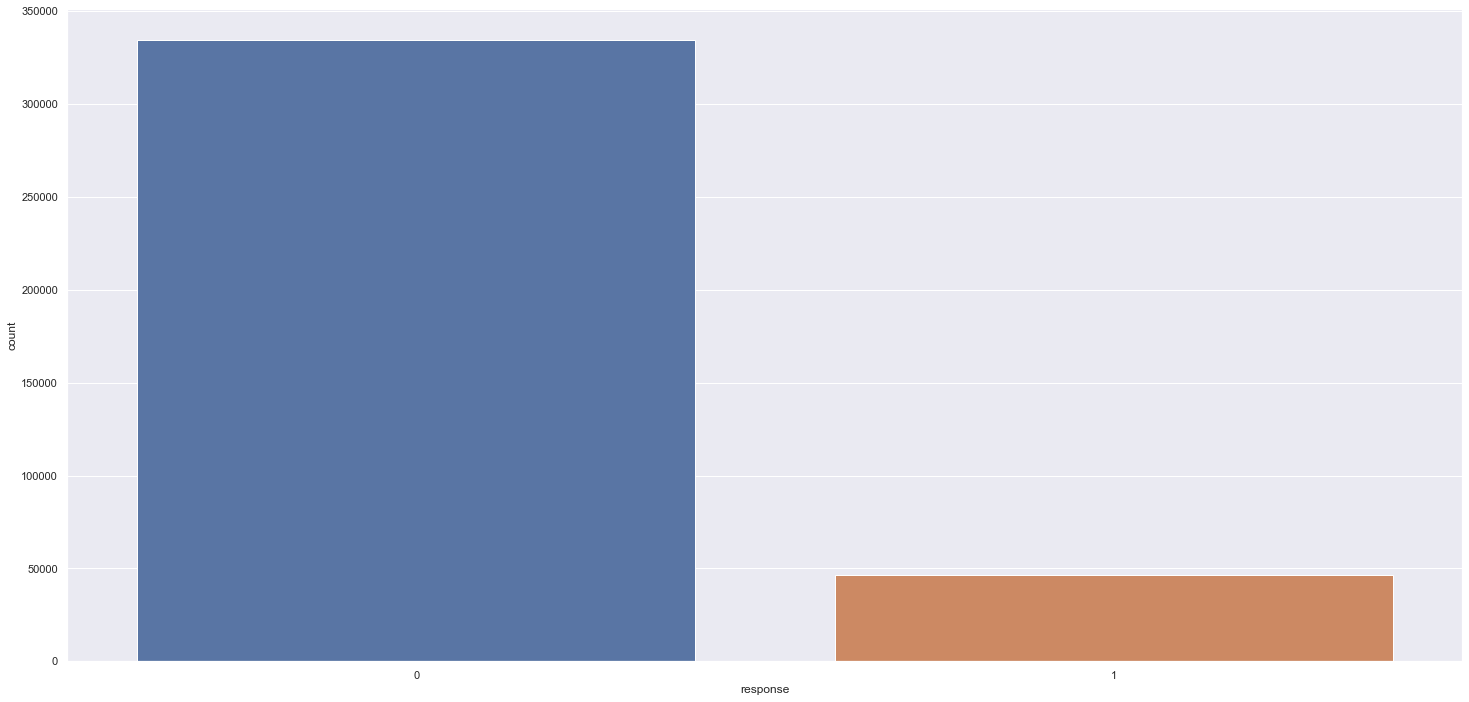

In [45]:
sns.countplot(df4['response']);

## 4.2 Bivariate Analysis

### 4.2.1 H1. Younger users should be more interested.

*False Hypothesis*

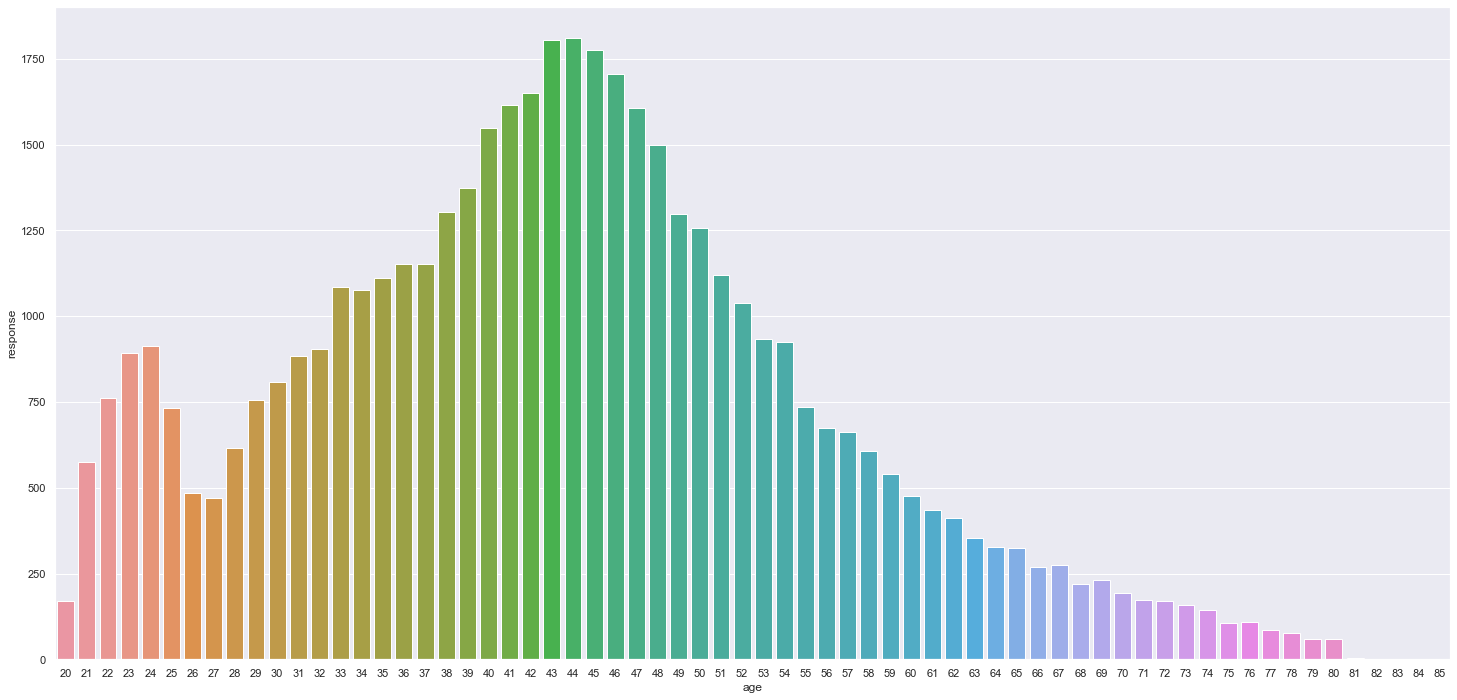

In [41]:
aux = df4[['age', 'response']].groupby( 'age' ).sum().reset_index()

sns.barplot(x ='age', y ='response', data=aux);

### 4.2.2 H2. Users with most time associated should be more interested

*False Hypothesis*

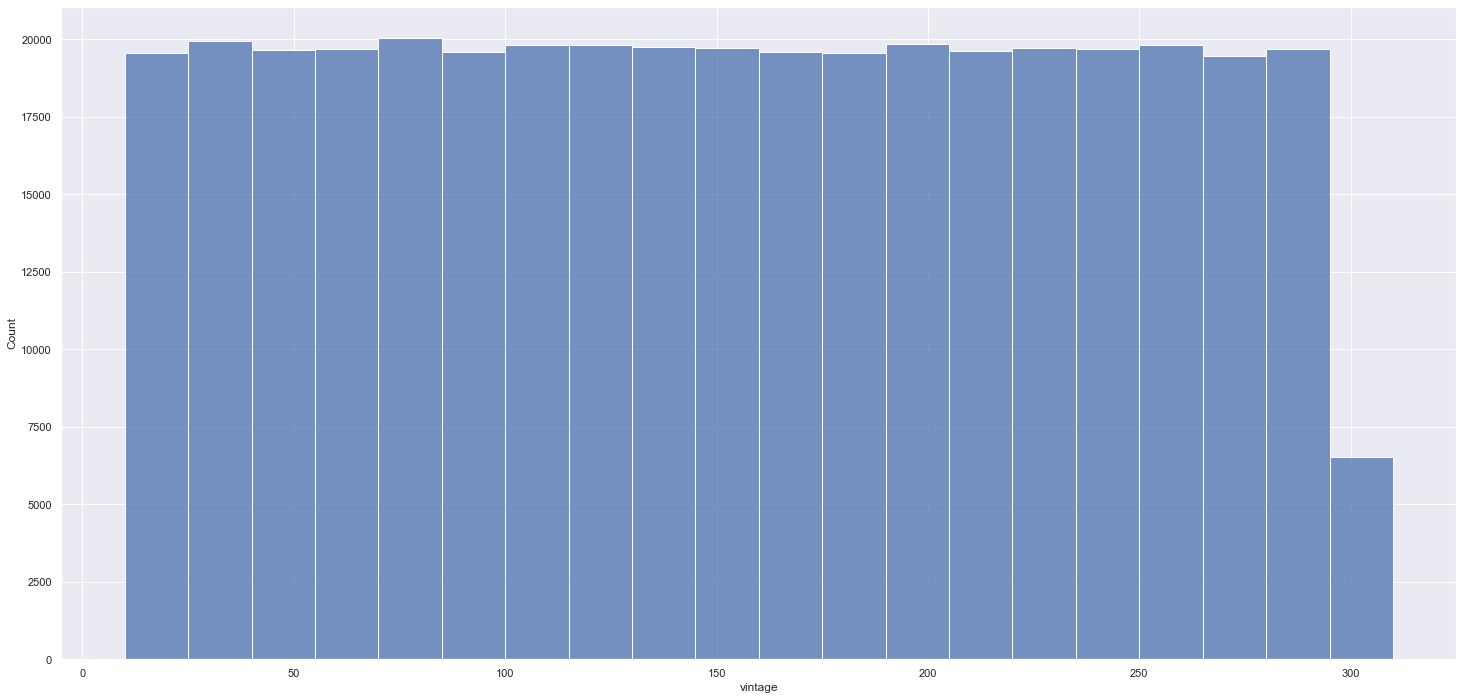

In [42]:
sns.histplot(data=df4, x ='vintage', binwidth = 15);

### 4.2.3 H3. Users with drivers license should be more interested

*True Hypothesis*

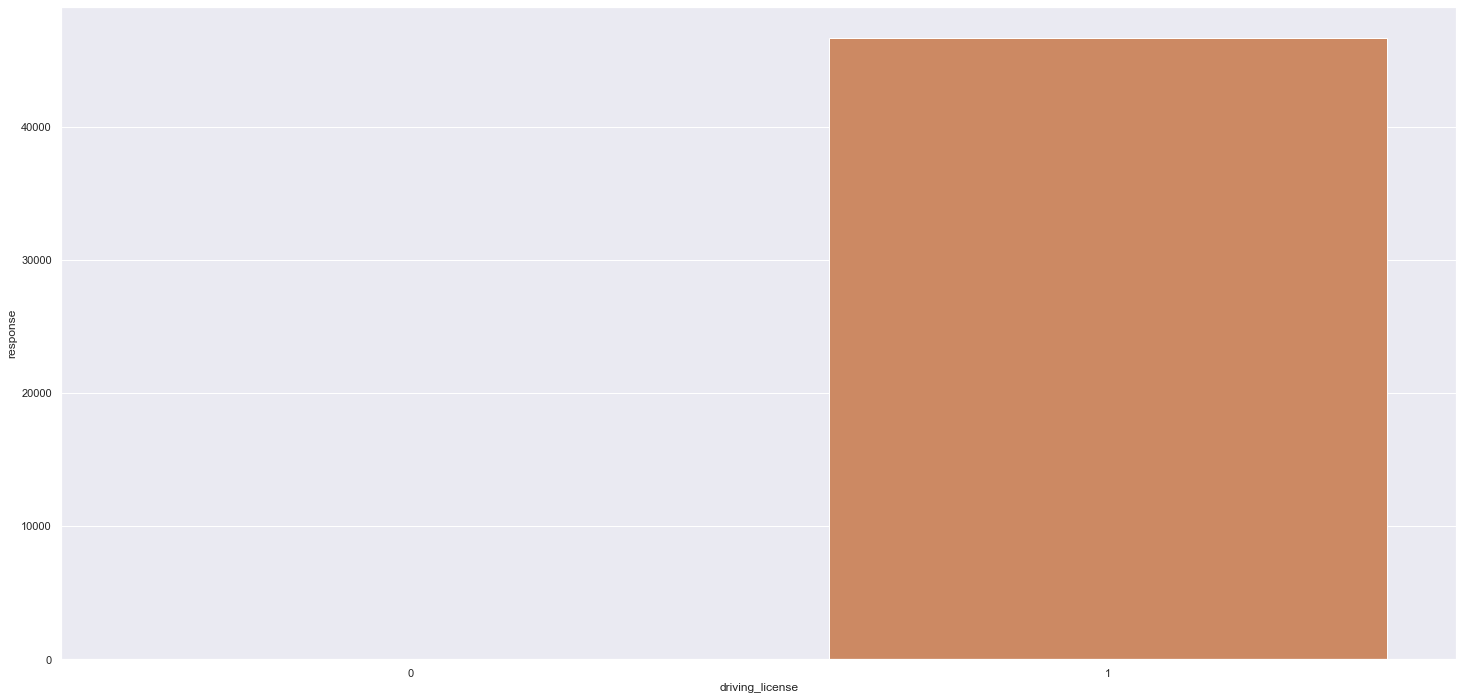

In [43]:
aux3 = df4[['driving_license', 'response']].groupby( 'driving_license' ).sum().reset_index()
sns.barplot(x ='driving_license', y ='response', data=aux3);

### 4.2.4 H4. Users that had car insurance are less interested than the ones who don't

*False Hypothesis*

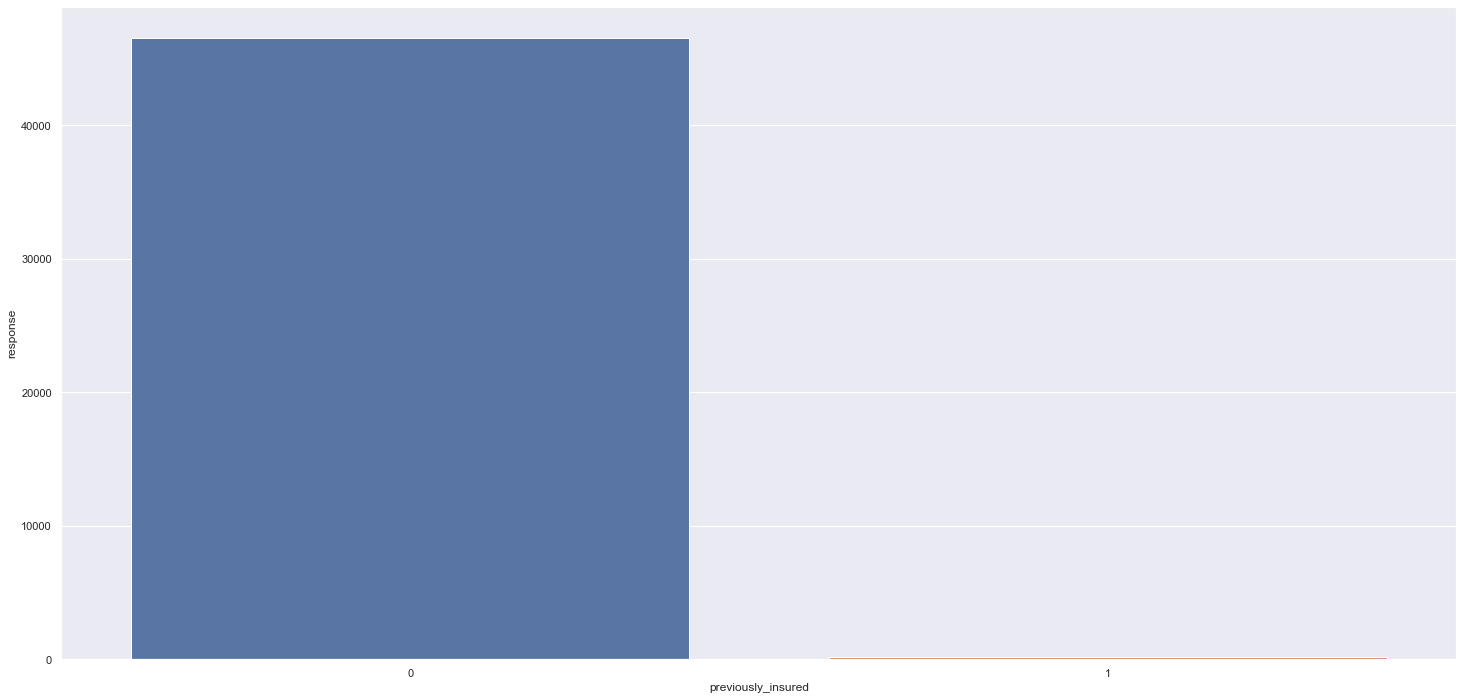

In [25]:
aux4 = df4[['previously_insured', 'response']].groupby( 'previously_insured' ).sum().reset_index()
sns.barplot(x ='previously_insured', y ='response', data=aux4);


### 4.2.5 H5. Users with the price for insurance lower should be more interested

*False Hypothesis*

# 5.0 Data Preparation

In [26]:
df5 = df4.copy()

## 5.1 Data Spliting

### 5.1.1 Split 10/90

In [27]:
# Split 10% data for testing and 90% for Training. Used random generator to be always deterministic.
x = df5.drop( 'response', axis=1 )
y = df5['response'].copy() 

x_train, x_test, y_train, y_test = ms.train_test_split( x, y, test_size=0.20, random_state = 22 )

df5 = pd.concat( [x_train, y_train], axis=1 )


### 5.1.2 Split 20/80

In [28]:
# Split 20% data for testing and 80% for Training. Used random generator to be always deterministic.
x_20 = df5.drop( 'response', axis=1 )
y_20 = df5['response'].copy() 

x_train_20, x_test_20, y_train_20, y_test_20 = ms.train_test_split( x_20, y_20, test_size=0.20, random_state = 22 )

df5_20 = pd.concat( [x_train_20, y_train_20], axis=1 )


### 5.1.3 Split 30/70

In [29]:
# Split 10% data for testing and 90% for Training. Used random generator to be always deterministic.
x_30 = df5.drop( 'response', axis=1 )
y_30 = df5['response'].copy() 

x_train_30, x_test_30, y_train_30, y_test_30 = ms.train_test_split( x_30, y_30, test_size=0.30, random_state = 22 )

df5_30 = pd.concat( [x_train_30, y_train_30], axis=1 )


## 5.2 Standardization of DataSets 

In [30]:
ss = pp.StandardScaler()

# annual_premium

# Train 10/90
df5_10['annual_premium'] = ss.fit_transform( df5_10[['annual_premium']].values )
# Train 20/80
df5_20['annual_premium'] = ss.fit_transform( df5_20[['annual_premium']].values )
# Train 30/70
df5_30['annual_premium'] = ss.fit_transform( df5_30[['annual_premium']].values )

## 5.3 Rescaling

In [31]:
mms_age = pp.MinMaxScaler()
mms_vintage = pp.MinMaxScaler()

# Age
df5_10['age'] = mms_age.fit_transform( df5_10[['age']].values )
df5_20['age'] = mms_age.fit_transform( df5_20[['age']].values )
df5_30['age'] = mms_age.fit_transform( df5_30[['age']].values )

# vintage
df5_10['vintage'] = mms_vintage.fit_transform( df5_10[['vintage']].values )
df5_20['vintage'] = mms_vintage.fit_transform( df5_20[['vintage']].values )
df5_30['vintage'] = mms_vintage.fit_transform( df5_30[['vintage']].values )

## 5.4 Encoding

In [32]:
# gender - One Hot Encoding / Target Encoding
target_encode_gender_10 = df5_10.groupby( 'gender' )['response'].mean()
df5_10.loc[:, 'gender'] = df5_10['gender'].map( target_encode_gender_10 )

target_encode_gender_20 = df5_20.groupby( 'gender' )['response'].mean()
df5_20.loc[:, 'gender'] = df5_20['gender'].map( target_encode_gender_20 )

target_encode_gender_30 = df5_30.groupby( 'gender' )['response'].mean()
df5_30.loc[:, 'gender'] = df5_30['gender'].map( target_encode_gender_30 )

# region_code - Target Encoding / Frequency Encoding
target_encode_region_code_10 = df5_10.groupby( 'region_code' )['response'].mean()
df5_10.loc[:, 'region_code'] = df5_10['region_code'].map( target_encode_region_code_10 )

target_encode_region_code_20 = df5_20.groupby( 'region_code' )['response'].mean()
df5_20.loc[:, 'region_code'] = df5_20['region_code'].map( target_encode_region_code_20 )

target_encode_region_code_30 = df5_30.groupby( 'region_code' )['response'].mean()
df5_30.loc[:, 'region_code'] = df5_30['region_code'].map( target_encode_region_code_30 )

# vehicle_age - One Hot Encoding / Frbequency Encoding
df5_10 = pd.get_dummies( df5_10, prefix='vehicle_age', columns=['vehicle_age'] )
df5_20 = pd.get_dummies( df5_20, prefix='vehicle_age', columns=['vehicle_age'] )
df5_30 = pd.get_dummies( df5_30, prefix='vehicle_age', columns=['vehicle_age'] )

# policy_sales_channel - Target Encoding / Frequency Encoding
fe_policy_sales_channel_10 = df5_10.groupby( 'policy_sales_channel' ).size() / len( df5_10 ) 
df5_10.loc[:, 'policy_sales_channel'] = df5_10['policy_sales_channel'].map( fe_policy_sales_channel_10 )

fe_policy_sales_channel_20 = df5_20.groupby( 'policy_sales_channel' ).size() / len( df5_20 ) 
df5_20.loc[:, 'policy_sales_channel'] = df5_20['policy_sales_channel'].map( fe_policy_sales_channel_20 )

fe_policy_sales_channel_30 = df5_30.groupby( 'policy_sales_channel' ).size() / len( df5_30 ) 
df5_30.loc[:, 'policy_sales_channel'] = df5_30['policy_sales_channel'].map( fe_policy_sales_channel_30 )

## 5.4 Testing DataPrep

In [33]:
# gender
x_test_10.loc[:, 'gender'] =  x_test_10.loc[:, 'gender'].map( target_encode_gender_10 )
x_test_20.loc[:, 'gender'] =  x_test_20.loc[:, 'gender'].map( target_encode_gender_20 )
x_test_30.loc[:, 'gender'] =  x_test_30.loc[:, 'gender'].map( target_encode_gender_30 )

# age
x_test_10.loc[:, 'age'] = mms_age.transform( x_test_10[['age']].values )
x_test_20.loc[:, 'age'] = mms_age.transform( x_test_20[['age']].values )
x_test_30.loc[:, 'age'] = mms_age.transform( x_test_30[['age']].values )

# region_code
x_test_10.loc[:, 'region_code'] = x_test_10.loc[:, 'region_code'].map( target_encode_region_code_10 )
x_test_20.loc[:, 'region_code'] = x_test_20.loc[:, 'region_code'].map( target_encode_region_code_20 )
x_test_30.loc[:, 'region_code'] = x_test_30.loc[:, 'region_code'].map( target_encode_region_code_30 )

# vehicle_age
x_test_10 = pd.get_dummies( x_test_10, prefix='vehicle_age', columns=['vehicle_age'] )
x_test_20 = pd.get_dummies( x_test_20, prefix='vehicle_age', columns=['vehicle_age'] )
x_test_30 = pd.get_dummies( x_test_30, prefix='vehicle_age', columns=['vehicle_age'] )

# annual_premium
x_test_10.loc[:, 'annual_premium'] = ss.transform( x_test_10[['annual_premium']].values )
x_test_20.loc[:, 'annual_premium'] = ss.transform( x_test_20[['annual_premium']].values )
x_test_30.loc[:, 'annual_premium'] = ss.transform( x_test_30[['annual_premium']].values )

# policy_sales_channel
x_test_10.loc[:, 'policy_sales_channel'] = x_test_10['policy_sales_channel'].map( fe_policy_sales_channel_10 )
x_test_20.loc[:, 'policy_sales_channel'] = x_test_20['policy_sales_channel'].map( fe_policy_sales_channel_20 )
x_test_30.loc[:, 'policy_sales_channel'] = x_test_30['policy_sales_channel'].map( fe_policy_sales_channel_30 )

# vintage
x_test_10.loc[:, 'vintage'] = mms_vintage.transform( x_test_10[['vintage']].values )
x_test_20.loc[:, 'vintage'] = mms_vintage.transform( x_test_20[['vintage']].values )
x_test_30.loc[:, 'vintage'] = mms_vintage.transform( x_test_30[['vintage']].values )

# fillna
x_test_10 = x_test_10.fillna( 0 )
x_test_20 = x_test_20.fillna( 0 )
x_test_30 = x_test_30.fillna( 0 )

# 6.0 Feature Selection

## 6.1 Feature Importance

In [34]:
# model definition
forest = en.ExtraTreesClassifier( n_estimators=250, random_state=0, n_jobs=-1 )

# data preparation
x_train_n_10 = df5_10.drop( ['id', 'response'], axis=1 )
y_train_n_10 = y_train_10.values
forest.fit( x_train_n_10, y_train_n_10 )

ExtraTreesClassifier(n_estimators=250, n_jobs=-1, random_state=0)

Feature ranking:
                        feature  importance
0                       vintage    0.273106
0                annual_premium    0.246297
0                           age    0.163115
0                   region_code    0.105246
0                vehicle_damage    0.067636
0          policy_sales_channel    0.059903
0            previously_insured    0.056411
0  vehicle_age_between_1_2_year    0.014857
0   vehicle_age_between_1_2year    0.005739
0                        gender    0.004635
0      vehicle_age_over_2_years    0.002573
0               driving_license    0.000482


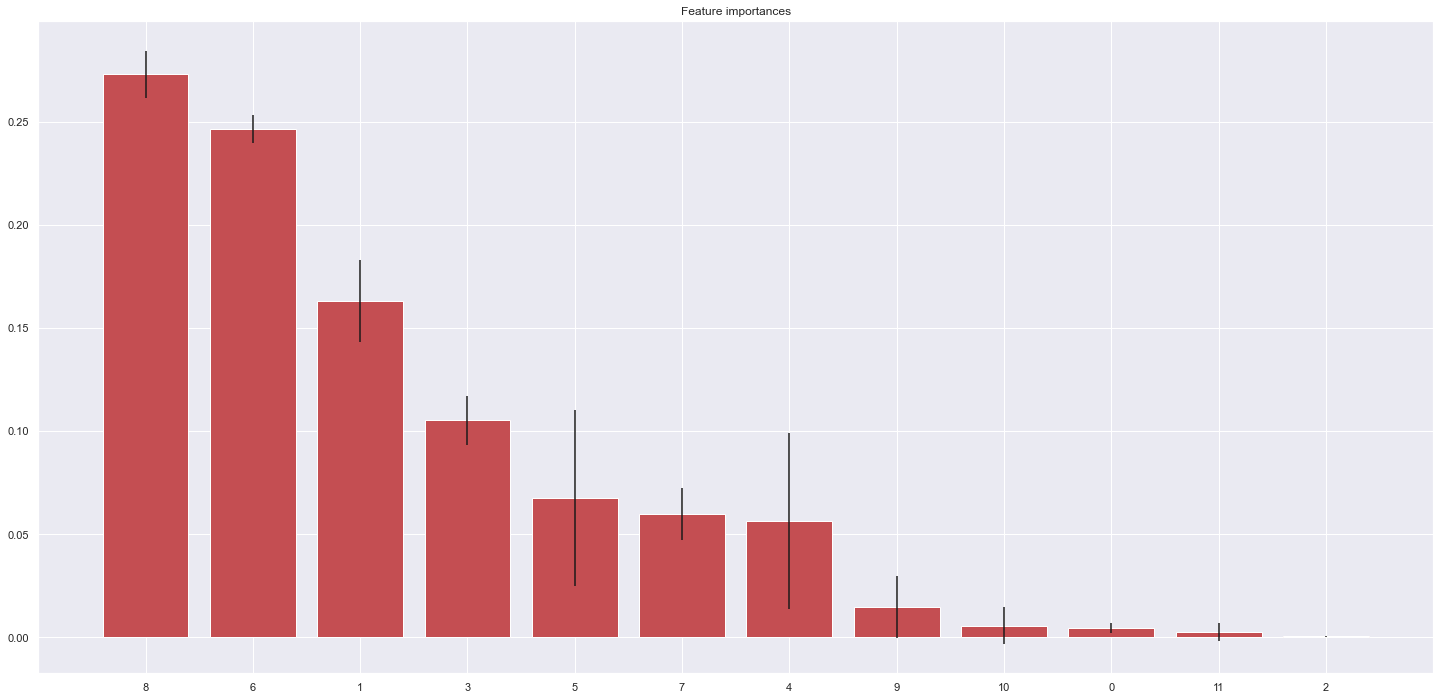

In [35]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
df = pd.DataFrame()
for i, j in zip( x_train_n_10, forest.feature_importances_ ):
    aux = pd.DataFrame( {'feature': i, 'importance': j}, index=[0] )
    df = pd.concat( [df, aux], axis=0 )
    
print( df.sort_values( 'importance', ascending=False ) )

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train_n_10.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train_n_10.shape[1]), indices)
plt.xlim([-1, x_train_n_10.shape[1]])
plt.show()

# 7.0 Machine Learning Modelling

In [36]:
cols_selected = ['annual_premium', 'vintage', 'age', 'region_code', 'vehicle_damage', 'previously_insured',
                 'policy_sales_channel']

In [37]:
x_train_10 = df5_10[ cols_selected ]
x_train_20 = df5_20[ cols_selected ]
x_train_30 = df5_30[ cols_selected ]

x_test_10 = x_test_10[ cols_selected ]
y_test_10 = y_test_10

x_test_20 = x_test_20[ cols_selected ]
y_test_20 = y_test_20

x_test_30 = x_test_30[ cols_selected ]
y_test_30 = y_test_30

## 7.1 KNN Classifier

### 7.1.1 Model Building

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
# model definition
knn = nh.KNeighborsClassifier( n_neighbors=7 )

# model training
knn_10 = knn.fit( x_train_10, y_train_10 )
knn_20 = knn.fit( x_train_20, y_train_20 )
knn_30 = knn.fit( x_train_30, y_train_30 )

# model prediction
y_pred_knn_10 = knn_10.predict_proba( x_test_10 )
y_pred_knn_20 = knn_20.predict_proba( x_test_20 )
y_pred_knn_30 = knn_30.predict_proba( x_test_30 )


In [40]:
#Compute accuracy on the training set
train_accuracy_10 = knn_10.score(x_train_10, y_train_10)
train_accuracy_20 = knn_20.score(x_train_20, y_train_20)
train_accuracy_30 = knn_30.score(x_train_30, y_train_30)   # Save the score value in the train_accuracy array

#Compute accuracy on the test set
test_accuracy_10 = knn_10.score(x_test_10, y_test_10)
test_accuracy_20 = knn_20.score(x_test_20, y_test_20)
test_accuracy_30 = knn_30.score(x_test_30, y_test_30)      # Save the score value in the train_accuracy array

### 7.1.2 Model Accuracy

In [41]:
knn_results = {'Dataset': ['10%','20%','30%'],
        'Accuracy Train': [train_accuracy_10,train_accuracy_20,train_accuracy_30],
        'Accuracy Test': [test_accuracy_10,test_accuracy_20,test_accuracy_30]}
knn_results = pd.DataFrame(knn_results, columns = ['Dataset', 'Accuracy Train','Accuracy Test'])

print (knn_results)

  Dataset  Accuracy Train  Accuracy Test
0     10%        0.882641       0.859175
1     20%        0.885466       0.859030
2     30%        0.888686       0.860250


## 7.2 Random Forest

### 7.2.1 Model Building

In [42]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf_model=RandomForestClassifier(n_estimators=100, min_samples_leaf=25)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf_10 = rf_model.fit(x_train_10,y_train_10)
rf_20 = rf_model.fit(x_train_20,y_train_20)
rf_30 = rf_model.fit(x_train_30,y_train_30)

y_pred_rf_10=rf_10.predict_proba(x_test_10)
y_pred_rf_20=rf_20.predict_proba(x_test_20)
y_pred_rf_30=rf_30.predict_proba(x_test_30)

In [43]:
#Compute accuracy on the training set
rf_train_accuracy_10 = rf_10.score(x_train_10, y_train_10)
rf_train_accuracy_20 = rf_20.score(x_train_20, y_train_20)
rf_train_accuracy_30 = rf_30.score(x_train_30, y_train_30)   # Save the score value in the train_accuracy array

#Compute accuracy on the test set
rf_test_accuracy_10 = rf_10.score(x_test_10, y_test_10)
rf_test_accuracy_20 = rf_20.score(x_test_20, y_test_20)
rf_test_accuracy_30 = rf_30.score(x_test_30, y_test_30)      # Save the score value in the train_accuracy array

### 7.2.2 Model Accuracy

In [44]:
rf_results = {'Dataset': ['10%','20%','30%'],
        'Accuracy Train': [rf_train_accuracy_10,rf_train_accuracy_20,rf_train_accuracy_30],
        'Accuracy Test': [rf_test_accuracy_10,rf_test_accuracy_20,rf_test_accuracy_30]}
rf_results = pd.DataFrame(rf_results, columns = ['Dataset', 'Accuracy Train','Accuracy Test'])

print (rf_results)

  Dataset  Accuracy Train  Accuracy Test
0     10%        0.877883       0.876755
1     20%        0.878007       0.876899
2     30%        0.877973       0.877839


## 7.3 Logistic Regression


### 7.3.1 Model Building

In [45]:
# model definition
lr_model = lm.LogisticRegression( random_state=42 ) 

# model training
lr_10 = lr_model.fit( x_train_10, y_train_10 )
lr_20 = lr_model.fit( x_train_20, y_train_20 )
lr_30 = lr_model.fit( x_train_30, y_train_30 )

# model prediction
y_pred_lr_10 = lr_model.predict_proba( x_test_10 )
y_pred_lr_20 = lr_model.predict_proba( x_test_20 )
y_pred_lr_30 = lr_model.predict_proba( x_test_30 )

In [46]:
#Compute accuracy on the training set
lr_train_accuracy_10 = lr_10.score(x_train_10, y_train_10)
lr_train_accuracy_20 = lr_20.score(x_train_20, y_train_20)
lr_train_accuracy_30 = lr_30.score(x_train_30, y_train_30)   # Save the score value in the train_accuracy array

#Compute accuracy on the test set
lr_test_accuracy_10 = lr_10.score(x_test_10, y_test_10)
lr_test_accuracy_20 = lr_20.score(x_test_20, y_test_20)
lr_test_accuracy_30 = lr_30.score(x_test_30, y_test_30)      # Save the score value in the train_accuracy array

### 7.3.2 Model Accuracy

In [47]:
lr_results = {'Dataset': ['10%','20%','30%'],
        'Accuracy Train': [lr_train_accuracy_10,lr_train_accuracy_20,lr_train_accuracy_30],
        'Accuracy Test': [lr_test_accuracy_10,lr_test_accuracy_20,lr_test_accuracy_30]}
lr_results = pd.DataFrame(lr_results, columns = ['Dataset', 'Accuracy Train','Accuracy Test'])

print (lr_results)

  Dataset  Accuracy Train  Accuracy Test
0     10%        0.877530       0.876597
1     20%        0.877594       0.876807
2     30%        0.877298       0.877761


# 8.0 Performance Metrics

## 8.1 KNN

In [48]:
df8_knn_10 = x_test_10.copy()
df8_knn_10['response'] = y_test_10.copy()

df8_knn_20 = x_test_20.copy()
df8_knn_20['response'] = y_test_20.copy()

df8_knn_30 = x_test_30.copy()
df8_knn_30['response'] = y_test_30.copy()

#propensity score
df8_knn_10['score'] = y_pred_knn_10[:,1].tolist()
df8_knn_20['score'] = y_pred_knn_20[:,1].tolist()
df8_knn_30['score'] = y_pred_knn_30[:,1].tolist()

# sort clients by propensity score
df8_knn_10 = df8_knn_10.sort_values('score', ascending = False)
df8_knn_20 = df8_knn_20.sort_values('score', ascending = False)
df8_knn_30 = df8_knn_30.sort_values('score', ascending = False)

# compute precision at k
precision_at_20000_knn_10 = precision_at_k( df8_knn_10, k = 20000)
print('KNN 10% Precision at K: {}'.format( precision_at_20000_knn_10 ))

precision_at_20000_knn_20 = precision_at_k( df8_knn_20, k = 20000)
print('KNN 20% Precision at K: {}'.format( precision_at_20000_knn_20 ))

precision_at_20000_knn_30 = precision_at_k( df8_knn_30, k = 20000)
print('KNN 30% Precision at K: {}'.format( precision_at_20000_knn_30 ))


# compute recall at k
recall_at_20000_knn_10 = recall_at_k( df8_knn_10, k = 20000)
print('KNN 10% Recall at K: {}'.format( recall_at_20000_knn_10 ))

recall_at_20000_knn_20 = recall_at_k( df8_knn_20, k = 20000)
print('KNN 20% Recall at K: {}'.format( recall_at_20000_knn_20 ))

recall_at_20000_knn_30 = recall_at_k( df8_knn_30, k = 20000)
print('KNN 30% Recall at K: {}'.format( recall_at_20000_knn_30 ))

KNN 10% Precision at K: 0.20898955052247387
KNN 20% Precision at K: 0.29148542572871355
KNN 30% Precision at K: 0.3010849457527124
KNN 10% Recall at K: 0.8887943865617691
KNN 20% Recall at K: 0.6208732694355698
KNN 30% Recall at K: 0.43088151116199197


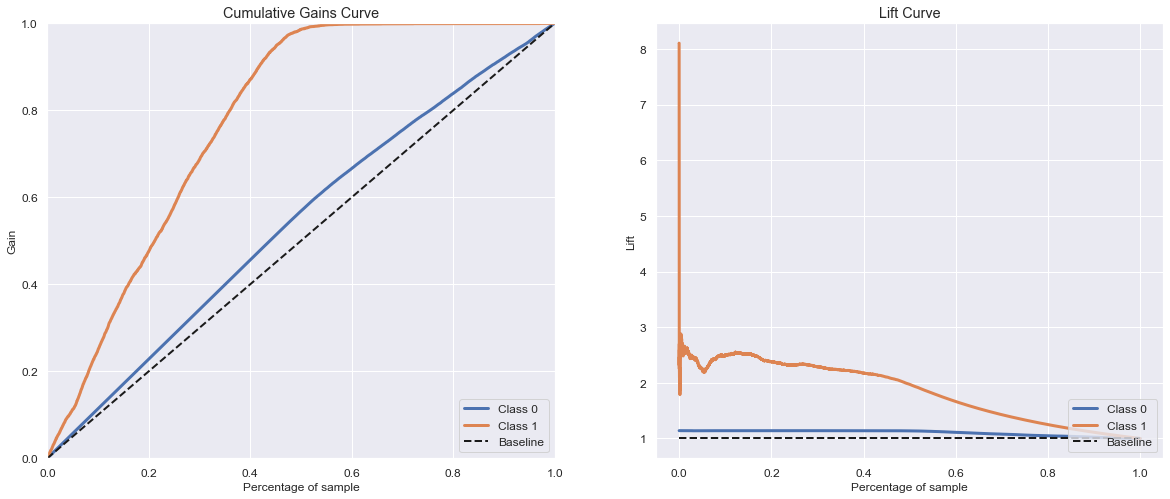

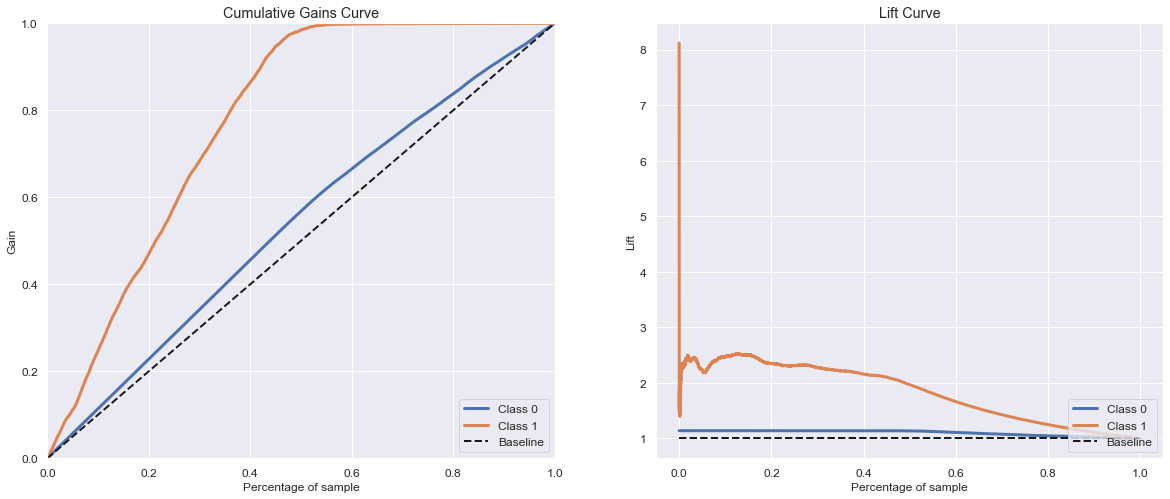

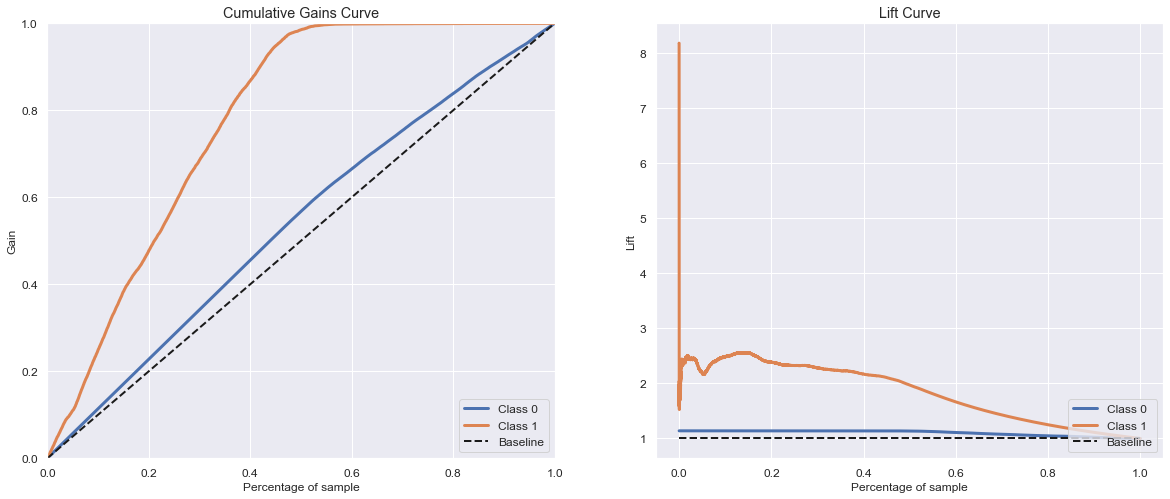

In [49]:
fig, axs = plt.subplots(1, 2, figsize = (20, 8))
plot_cumulative_gain(y_test_10, y_pred_lr_10, ax = axs[0]);
plot_lift_curve(y_test_10, y_pred_lr_10, ax = axs[1]);

fig, axs = plt.subplots(1, 2, figsize = (20, 8))
plot_cumulative_gain(y_test_20, y_pred_lr_20, ax = axs[0]);
plot_lift_curve(y_test_20, y_pred_lr_20, ax = axs[1]);

fig, axs = plt.subplots(1, 2, figsize = (20, 8))
plot_cumulative_gain(y_test_30, y_pred_lr_30, ax = axs[0]);
plot_lift_curve(y_test_30, y_pred_lr_30, ax = axs[1]);

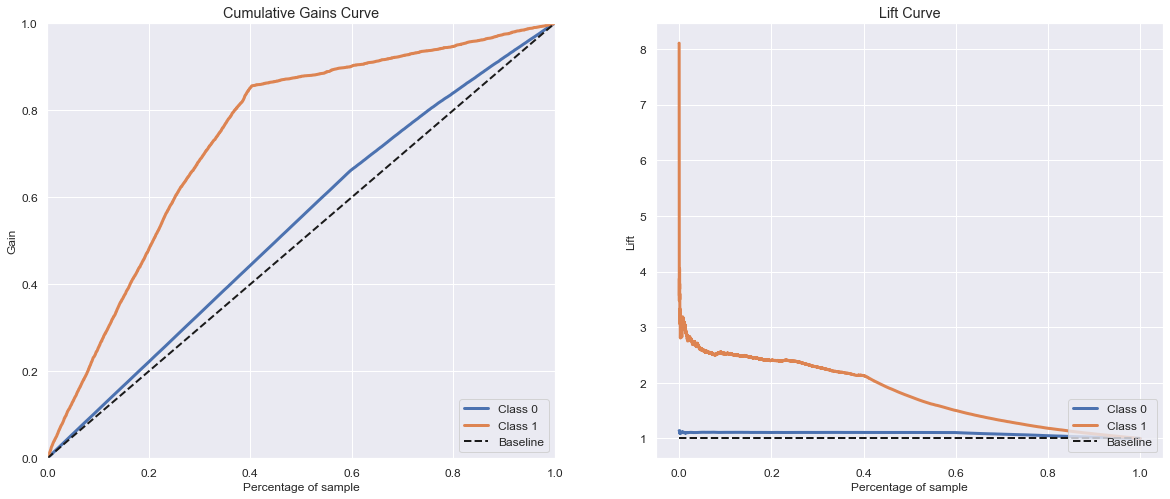

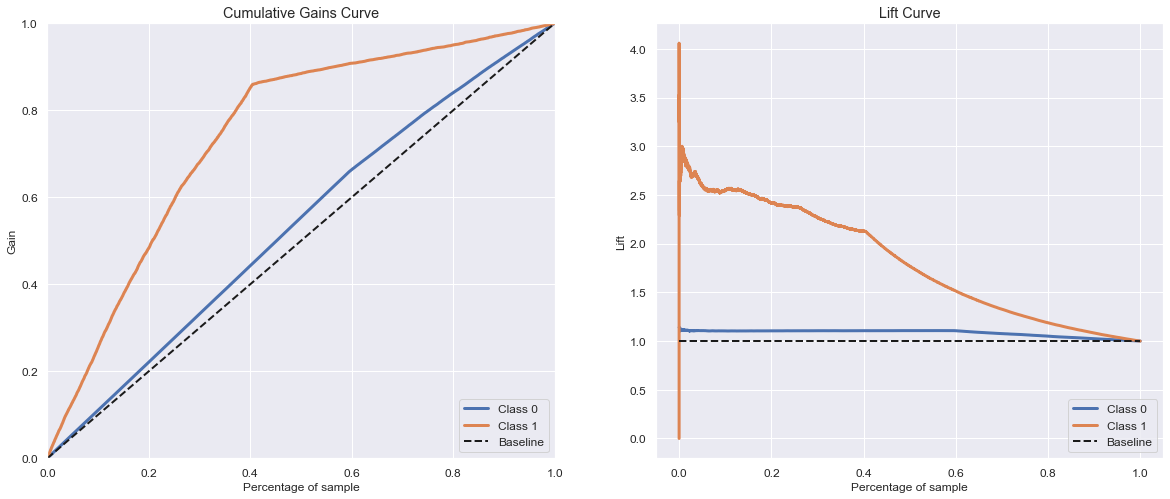

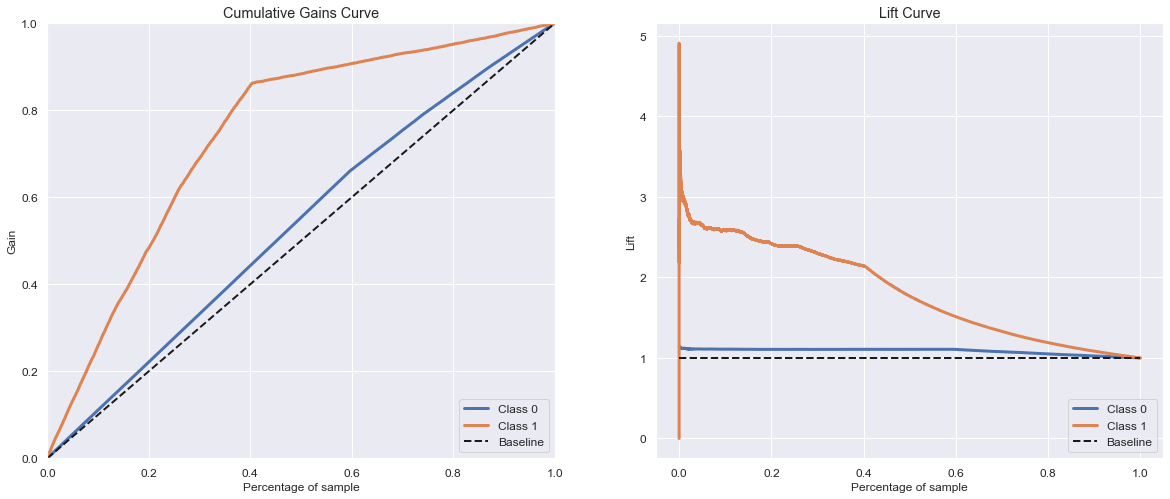

In [50]:
fig, axs = plt.subplots(1, 2, figsize = (20, 8))
plot_cumulative_gain(y_test_10, y_pred_knn_10, ax = axs[0]);
plot_lift_curve(y_test_10, y_pred_knn_10, ax = axs[1]);

fig, axs = plt.subplots(1, 2, figsize = (20, 8))
plot_cumulative_gain(y_test_20, y_pred_knn_20, ax = axs[0]);
plot_lift_curve(y_test_20, y_pred_knn_20, ax = axs[1]);

fig, axs = plt.subplots(1, 2, figsize = (20, 8))
plot_cumulative_gain(y_test_30, y_pred_knn_30, ax = axs[0]);
plot_lift_curve(y_test_30, y_pred_knn_30, ax = axs[1]);

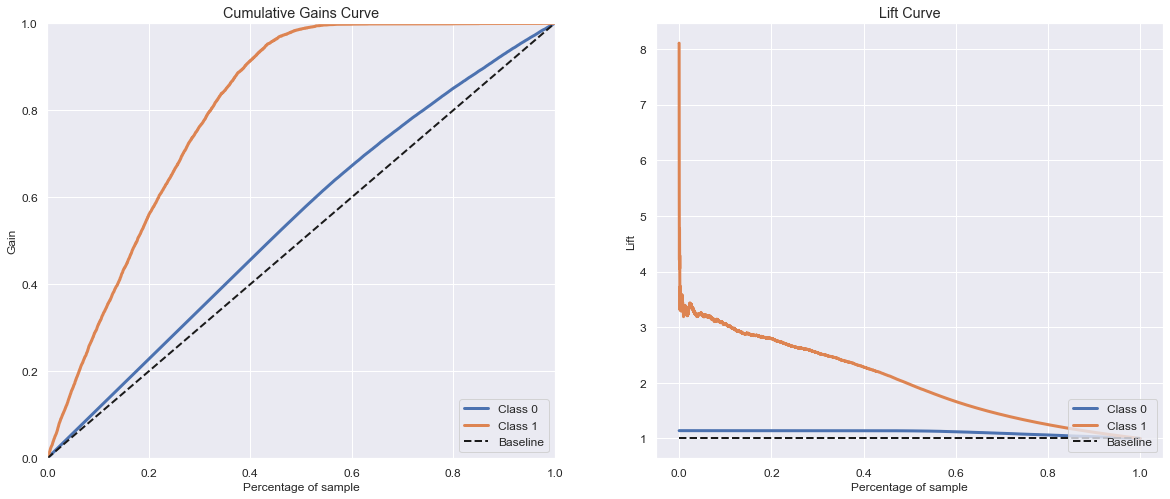

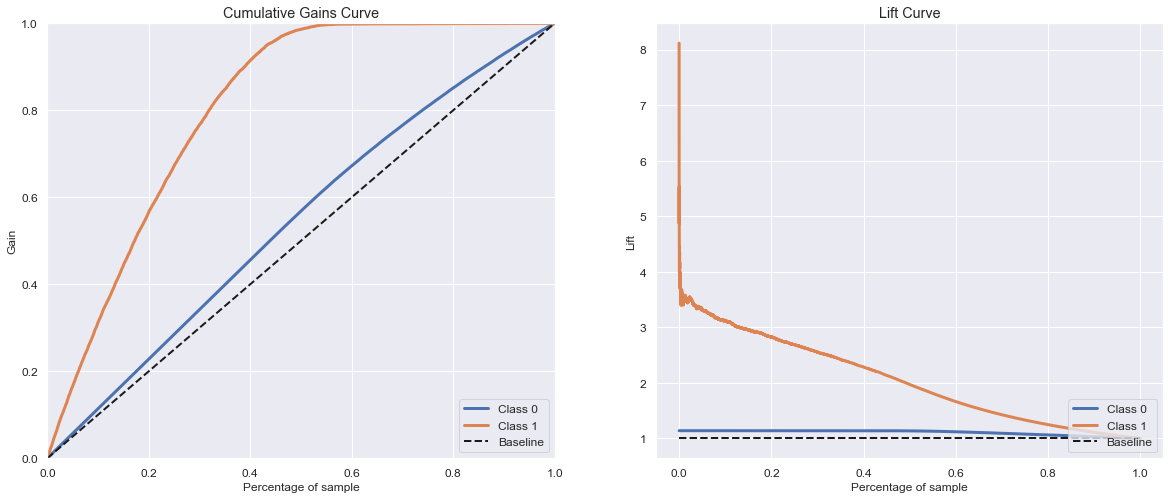

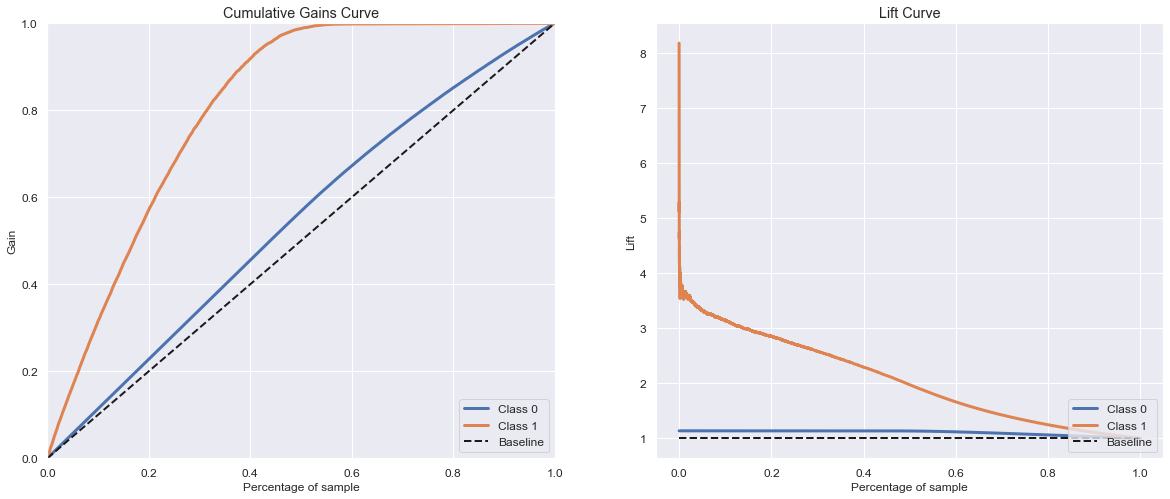

In [51]:
fig, axs = plt.subplots(1, 2, figsize = (20, 8))
plot_cumulative_gain(y_test_10, y_pred_rf_10, ax = axs[0]);
plot_lift_curve(y_test_10, y_pred_rf_10, ax = axs[1]);

fig, axs = plt.subplots(1, 2, figsize = (20, 8))
plot_cumulative_gain(y_test_20, y_pred_rf_20, ax = axs[0]);
plot_lift_curve(y_test_20, y_pred_rf_20, ax = axs[1]);

fig, axs = plt.subplots(1, 2, figsize = (20, 8))
plot_cumulative_gain(y_test_30, y_pred_rf_30, ax = axs[0]);
plot_lift_curve(y_test_30, y_pred_rf_30, ax = axs[1]);

## 8.1 Compare Models Performance

### 8.1.1 Single Performance

In [53]:
def cross_validation( x_training, kfold, model_name, model, verbose=False ):
    precision_at_k = []
    for k in reversed( range( 1, kfold+1 ) ):
        if verbose:
            print( '\nKFold Number: {}'.format( k ) )

### 8.1.2 Real Performance - Cross Validation

In [54]:
from scikitplot.metrics        import plot_cumulative_gain, plot_lift_curve


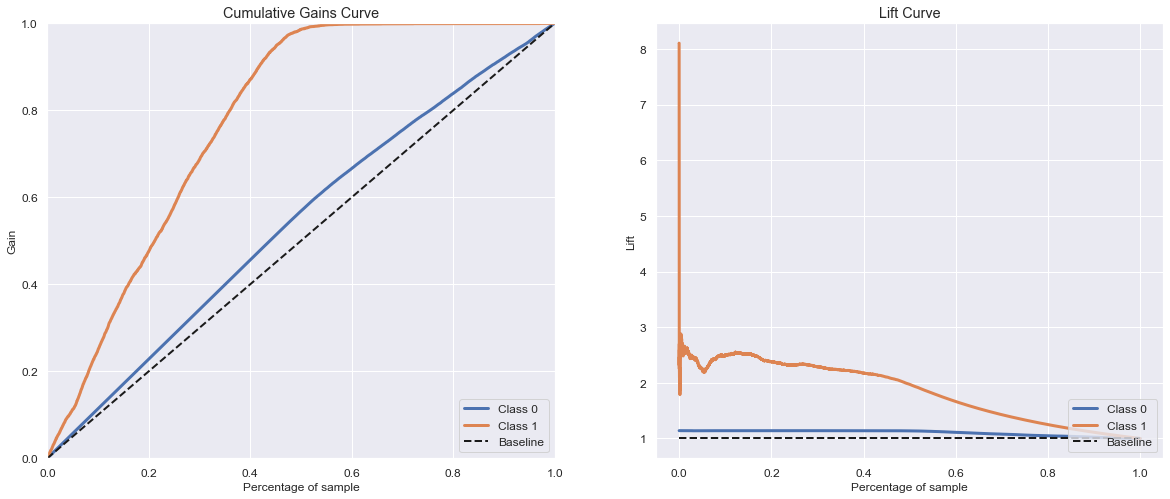

In [55]:
fig, axs = plt.subplots(1, 2, figsize = (20, 8))
plot_cumulative_gain(y_test_10, y_pred_lr_10, ax = axs[0]);
plot_lift_curve(y_test_10, y_pred_lr_10, ax = axs[1]);

In [56]:
def cross_validation(X_train_, Y_train_, folds, model):
    skfold = StratifiedKFold(n_splits = folds, shuffle = True, random_state = 7)
    df_fold = skfold.split(X_train_, Y_train_)
    
    cross_df = pd.DataFrame(columns = ['Model', 'Folds', 'F1', 'Recall'])
    
    for mdl in model:
        f1 = []
        recall = []
        precision_k = []
        recall_k = []
        
        for train_i, val_i in df_fold:
            x_train_fold = X_train_.iloc[train_i]
            y_train_fold = Y_train_.iloc[train_i]
            
            x_test_fold = X_train_.iloc[val_i]
            y_test_fold = Y_train_.iloc[val_i]

            model_ = mdl.fit(x_train_fold, y_train_fold)
            y_hat = model_.predict(x_test_fold)
            
            f1.append(f1_score(y_test_fold, y_hat))
            recall.append(recall_score(y_test_fold, y_hat))
            
            y_hat_proba = model_.predict_proba(x_test_fold)
            
            precision_k.append(precision_at_k(x_test_fold, y_test_fold, y_hat_proba, k = 0.3))
            recall_k.append(recall_at_k(x_test_fold, y_test_fold, y_hat_proba, k = 0.3))
            
        new_row = {'Model': type(mdl).__name__, 
                   'Folds': folds,
                   'F1': np.mean(f1),
                   'Recall': np.mean(recall),
                   'Precision @ K': np.mean(precision_k),
                   'Recall @ K': np.mean(recall_k)}
            
        cross_df = cross_df.append(new_row, ignore_index = True)
            
    return cross_df

In [57]:
# cross validation
def cross_validation( data, model, x_train, y_train, k, sort=True, verbose=False ):
    if sort:
        model = sorted(model, key=lambda x: type(x).__name__)

    kfold = ms.StratifiedKFold(n_splits=k, shuffle=True, random_state=17)
    precision_list = []
    recall_list = []
    model_df = []
    j = 1
    l = len(model)

    for m in model:
        i = 1
        m_name = type(m).__name__
        if verbose:
            print(f"CV - Folding model {j}/{l} -> " + m_name + "..." )
        for train_cv, val_cv in kfold.split(x_train, y_train):
            if verbose:
                print(f'Fold Number {i}/{k}')
            x_train_fold = x_train.iloc[train_cv]
            y_train_fold = y_train.iloc[train_cv]
            x_val_fold = x_train.iloc[val_cv]
            y_val_fold = y_train.iloc[val_cv]

            model_fit = m.fit(x_train_fold, y_train_fold)
            yhat = m.predict_proba(x_val_fold)

            data = x_val_fold.copy()
            data['response'] = y_val_fold.copy()
            data['score'] = yhat[:, 1].tolist()
            data = data.sort_values('score', ascending=False)

            precision = precision_at_k(data)
            precision_list.append(precision)

            recall = recall_at_k(data)
            recall_list.append(recall)

            i += 1

        df = pd.DataFrame({'Model_Name': m_name,
                           'Precision@K Mean': np.mean(precision_list).round(4),
                           'Precision@K STD': np.std(precision_list).round(4),
                           'Recall@K Mean': np.mean(recall_list).round(4),
                           'Recall@K STD': np.std(recall_list).round(4)}, index=[0])
        j += 1
        model_df.append(df)
        final_model = pd.concat(model_df)

    return final_model

In [58]:
# Manual choice of models for Cross Validation
models_cv =[RandomForestClassifier(n_estimators=100, min_samples_leaf=25),
           nh.KNeighborsClassifier( n_neighbors=7 ),
            lm.LogisticRegression( random_state=42 ) ]

In [59]:
cv_results = cross_validation(df5_10 , models_cv, x_train_10, y_train_10, 5 ) 

In [60]:
cv_results

,Model_Name,Precision@K Mean,Precision@K STD,Recall@K Mean,Recall@K STD
0,KNeighborsClassifier,0.2839,0.0006,0.6759,0.0014
0,LogisticRegression,0.2831,0.0012,0.6739,0.0029
0,RandomForestClassifier,0.2960,0.0183,0.7047,0.0437
